#Name:Sanika Kaginkar   Roll No: 22102A2008 CMPN A
Github Link:  https://github.com/Sanika-Kaginkar/ML_LAB/blob/main/ML_EXP_05.ipynb

**1. Data Preparation**

Classification Dataset (Breast Cancer Wisconsin)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer Wisconsin dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

# Prepare the data
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Regression Dataset (California Housing)

In [14]:
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
X_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
y_housing = housing.target

# Split the dataset into training and testing sets
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)


**2. Implementing XGBoost Models**

Classification Task

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.96
Precision: 0.95
Recall: 0.93
F1-score: 0.94
ROC AUC: 0.95


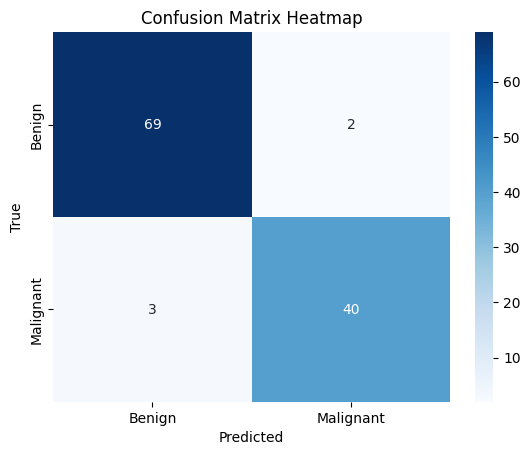

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
# Construct and train an XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


Regression Task

Mean Squared Error: 0.22
R-squared: 0.83


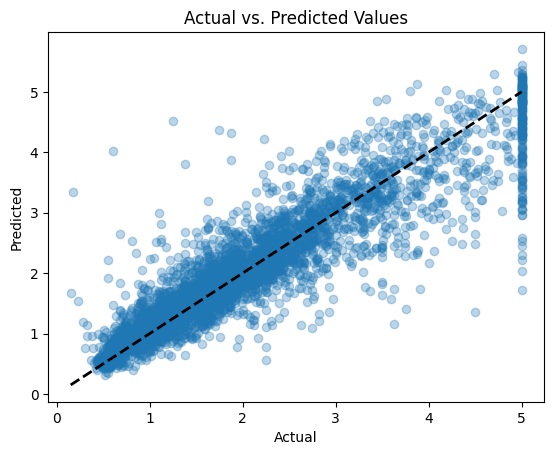

In [16]:
# Construct and train an XGBoost regressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train_housing, y_train_housing)

# Predict the target variable on the testing set
y_pred_housing = xgb_regressor.predict(X_test_housing)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test_housing, y_pred_housing)
r2 = r2_score(y_test_housing, y_pred_housing)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plot actual vs. predicted values
plt.scatter(y_test_housing, y_pred_housing, alpha=0.3)
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


**3. Comparing with Random Forest**

Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Construct and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


Random Forest Accuracy: 0.96


Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Construct and train a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_housing, y_train_housing)

# Predict and evaluate
y_pred_rf_housing = rf_regressor.predict(X_test_housing)
mse_rf = mean_squared_error(y_test_housing, y_pred_rf_housing)
print(f'Random Forest Mean Squared Error: {mse_rf:.2f}')


Random Forest Mean Squared Error: 0.26
